# &#x1F4D8; P1: The Stroop Effect
### In this project, we will have a look at a classic phenomenon from experimental psychology called the Stroop Effect.
Link to The Stroop Effect (https://en.wikipedia.org/wiki/Stroop_effect)
### An investigation for determining the time it takes to name the ink colors in equally-sized lists.
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition. 

### 1. What is our independent variable? What is our dependent variable?

### 1.1. What is the independent variable in the experiment?
#### <span style="color:darkblue">"Condition" (congruent words or incongruent words).</span>
<span style="color:darkblue">In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed. The value of the variable in this case "True".</span>

<span style="color:darkblue">In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed. The value of the variable - "False".</span>

### 1.2. What is the dependent variable in the experiment?
#### <span style="color:darkblue">"Reading time".</span>

### 1.3. How is the dependent variable operationally defined?
#### <span style="color:darkblue">The operational definition of the dependent variable "Reading time" is "the time it takes to name the ink colors in equally-sized lists".</span>

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

### 2.1. What is an appropriate set of hypotheses for this task? 
<span style="color:darkblue">The set of hypotheses:</span>

<span style="color:darkblue">1) Supposing the value of the variable "Condition" (congruent words or incongruent words) does not significantly affect the value of the variable "Reading time", let us formulate the null hypothesis.</span>
### <span style="color:darkblue">Ho: μ1 = μ2, where</span>
#### <span style="color:darkblue">μ1 - the population mean of the dependent variable "Reading time" under the congruent words condition;</span>
#### <span style="color:darkblue">μ2 - the population mean of the dependent variable "Reading time" under the incongruent words condition.</span>
<span style="color:darkblue">2) This time let us suppose that in the incongruent words condition the value of the variable "Reading time" does not equal (exceeds) the value of this indicator for the congruent words condition. The alternative hypothesis is</span>
### <span style="color:darkblue">H1: μ1< μ2, where</span>
#### <span style="color:darkblue">μ1 - the  population mean of the dependent variable "Reading time" under the congruent words condition;</span>
#### <span style="color:darkblue">μ2 - the population mean of the dependent variable "Reading time" under the incongruent words condition.</span>
<span style="color:darkblue">Here we can use the one-sided alternative hypothesis, since the tendency of increasing the time of reading for the incongruent words condition  is clearly traceable.</span>

### 2.2. What kind of statistical test do you expect to perform? 
<span style="color:darkblue">I think a t-test will be needed in this case.</span>

<span style="color:darkblue">This test usually helps us to compare whether two groups have different average values. The t-test asks can be a difference between averages of two groups because of random chance in sample selection or not. A difference is meaningful if it'is large or the sample size is big or responses are not widely spread out (the standard deviation is small).</span>

<span style="color:darkblue">Perhaps, it should be a test of the null hypothesis that the difference between two responses measured on the same statistical unit has a mean value of zero. This is often referred to as the "paired" or "repeated measures" t-test.</span>

<span style="color:darkblue">And about the confidence intervals. Of course, in applied practice they are typically stated at the 95% confidence level. But here it's possible to use the level 99% because of the obvious data trend.</span>

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

Let's do a basic statistical calculation on the data using code.

In [2]:
import pandas as pd
path = r'~/Downloads/stroopdata.csv'

dataFrame = pd.read_csv(path)
dataFrame.head(3)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214


The data shows a significant difference between the time of reading: the congruent words condition has a higher speed. This conclusion is confirmed by the description of each database column. For the congruent words condition all the important indicators (mean, min, max) for the time of reading are less.

In [3]:
dataFrame['Congruent'].describe()

count    24.000000
mean     14.051125
std       3.559358
min       8.630000
25%      11.895250
50%      14.356500
75%      16.200750
max      22.328000
Name: Congruent, dtype: float64

In [4]:
dataFrame['Incongruent'].describe()

count    24.000000
mean     22.015917
std       4.797057
min      15.687000
25%      18.716750
50%      21.017500
75%      24.051500
max      35.255000
Name: Incongruent, dtype: float64

Having seen clearly the central tendency, we can find the difference between the two measures and evaluate it using the t-test.

In [5]:
difference = dataFrame['Incongruent'] - dataFrame['Congruent']

In [6]:
difference.describe()

count    24.000000
mean      7.964792
std       4.864827
min       1.950000
25%       3.645500
50%       7.666500
75%      10.258500
max      21.919000
dtype: float64

In [7]:
from scipy.stats import ttest_rel
a = dataFrame['Incongruent']
b = dataFrame['Congruent']
t_statistic, pvalue_2tailed = ttest_rel(a, b, axis=0)

In [8]:
t_statistic

8.020706944109957

In [9]:
pvalue_2tailed

4.1030005857111781e-08

In [10]:
pvalue_1tailed = pvalue_2tailed*2
pvalue_1tailed

8.2060011714223563e-08

Let us also appreciate the difference in percentage between the indicators for two states. 

In [13]:
difference_in_percentages = 100*(dataFrame['Incongruent'] - dataFrame['Congruent']) / dataFrame['Congruent']

In [14]:
difference_in_percentages.describe()

count     24.000000
mean      63.416211
std       42.315618
min        9.835185
25%       25.107254
50%       63.423393
75%       86.451366
max      177.209152
dtype: float64

It is possible to describe how many times one indicator is superior to the another.

In [15]:
coefficient = dataFrame['Incongruent']/dataFrame['Congruent']

In [16]:
coefficient.describe()

count    24.000000
mean      1.634162
std       0.423156
min       1.098352
25%       1.251073
50%       1.634234
75%       1.864514
max       2.772092
dtype: float64

Let's unite the obtained data into one table of the indicators. 

In [17]:
difference_df = pd.DataFrame(data={'Coefficient': coefficient,
                                   'Difference in percentages': difference_in_percentages, 
                                   'Difference': difference,})
difference_df

,Coefficient,Difference,Difference in percentages
0,1.595993,7.199,59.599305
1,1.116134,1.950,11.613364
2,2.218110,11.650,121.810958
3,1.817729,7.057,81.772885
4,1.554503,8.134,55.450269
5,1.705998,8.640,70.599771
6,1.672475,9.880,67.247482
7,1.935462,8.407,93.546233
8,2.208488,11.361,120.848846
9,1.815055,11.802,81.505525


### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [19]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


The difference in the time of reading is clearly visible on the graph.

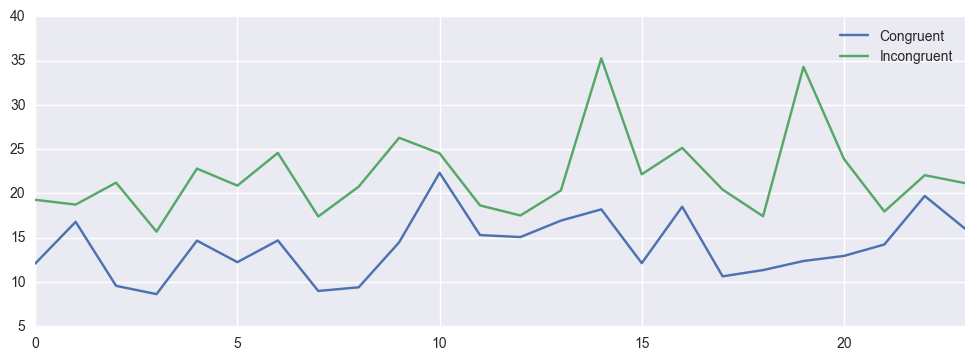

In [20]:
plt.rcParams['figure.figsize'] = (12, 4)
dataFrame.plot()

This indicator is always greater than zero.

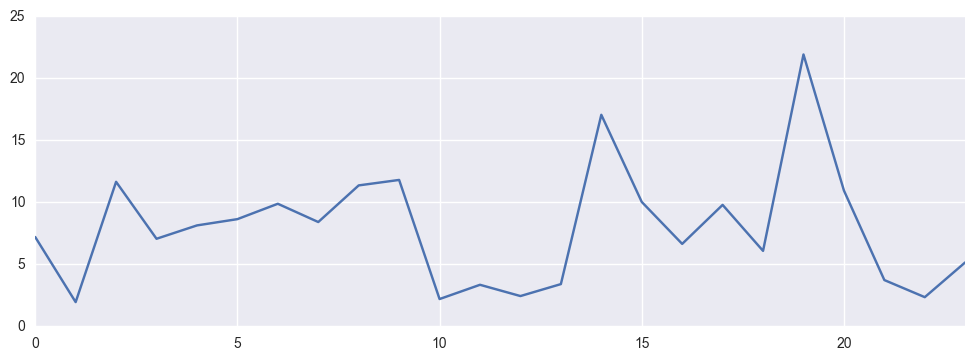

In [21]:
plt.rcParams['figure.figsize'] = (12, 4)
difference.plot()

How many times the time of reading under the incongruent words condition is more than in another condition is reviewed at the next graph.

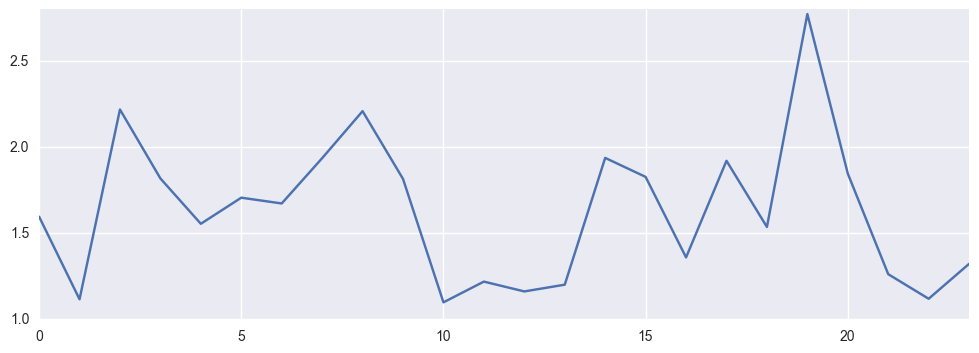

In [22]:
plt.rcParams['figure.figsize'] = (12, 4)
coefficient.plot()

It is easy to see this coefficient is always greater than 1.

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

### <span style="color:darkblue">Сonclusions.</span>
<span style="color:darkblue">We can see the t-test result has a large value. The probability of the events μ1 = μ2 "the  population means for two measures (for the congruent words condition and for the incongruent words condition) are equal" is p = 8.2060011714223563e-08. This goes beyond the confidence interval at the level 99% (α = 0.01). We must reject the null hypothesis at all. This result is in line with expectations and easily predictable.</span>

<span style="color:darkblue">In practice, it means that the speed of word reading under the congruent words condition differs significantly from this indicator under the incongruent words condition.</span>

<span style="color:darkblue">During this experiment, the time for reading under the incongruent words condition was on average 1.6 times greater than the time under the different condition. In the case of other research groups, this coefficient will obviously take other values due to differences in capabilities of cognitive control.</span>

### 6. Optional question: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

<span style="color:darkblue">The Stroop test helps to identify the flexibility / rigidity of cognitive control. This describing corresponds to the most simple explanation of the effect.</span>

<span style="color:darkblue">The results of the test can characterize the degree of subjective difficulties in changing ways of processing information in a situation of cognitive conflict. Rigid control indicates difficulties in the transition from verbal functions to sensory-perceptual functions due to the low degree of automation. Flexible control shows ease of this transition because of the high degree of automation.</span>

<span style="color:darkblue">However, the Stroop task and its associated effects are a multi-dimensional phenomenon that can not be fully explained by the concepts of cognitive control. Thorough understanding of other mechanisms requires more researches.</span>

<span style="color:darkblue">Of course, many modifications of this test can be useful in measuring and improving in the spheres of  selective attention, cognitive flexibility and processing speed. Here are some concrete examples:</span>

<span style="color:darkblue">1) It can be applied in the study of bilingualism. Participants can read on the card the words in one language, then on the other card - in another language, on the third card - the words printed in two languages one after another. This will help to understand whether one language dominates the another and what difficulties a person experiences during switching.</span>

<span style="color:darkblue">2) Exploring the emotional sphere also could be interesting.  Offering to read the words on the 4 different cards (positive, negative, neutral and mixed sets of words) will show some results as well, I am sure.</span>

<span style="color:darkblue">3) Exercises in the alternate accounting in the different number systems (for example, decimal and binary, one after another) can significantly extend the possibility of a particular individual.</span>